# BOW
bag of words.

1. 전체 문서를 구성하는 고정된 단어장을 만들고 
1. 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지 비교 후
1. 횟수 or 있는지 없는지 체크

- `DictVectorizer`:
단어의 수를 세어놓은 사전에서 BOW 벡터를 만든다.
- `CountVectorizer`:
문서 집합으로부터 단어의 수를 세어 BOW 벡터를 만든다.
- `TfidfVectorizer`:
문서 집합으로부터 단어의 수를 세고 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다.
- `HashingVectorizer`:
hashing trick 을 사용하여 빠르게 BOW 벡터를 만든다.

### DictVectorizer
사전 형태로 되어있는 feature 정보를 matrix형태로 변환
- corpus 상의 각 단어의 사용 빈도를 나타내는 경우가 많음

In [1]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D) # fit / transform
X 

array([[1., 2., 0.],
       [0., 3., 1.]])

In [2]:
print(v.feature_names_)
print(v.inverse_transform(X))
print(v.transform({'C': 4, 'D': 3}))

['A', 'B', 'C']
[{'A': 1.0, 'B': 2.0}, {'B': 3.0, 'C': 1.0}]
[[0. 0. 4.]]


## CountVectorizer
`= tokenizing + counting + BOW`

#### 다양한 인수를 가진다. 그 중 중요한 것들은 다음과 같다.

- `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
stop words 목록.‘english’이면 영어용 스탑 워드 사용.
- `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
- `tokenizer` : 함수 또는 None (디폴트)
토큰 생성 함수 .
- `token_pattern` : string
토큰 정의용 정규 표현식
- `ngram_range` : (min_n, max_n) 튜플
n-그램 범위
- `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최대 빈도
- `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
단어장에 포함되기 위한 최소 빈도
- `vocabulary` : 사전이나 리스트
단어장

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_ # 각 단어에 이름표(숫자)를 붙임 - 단어장 생성

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [4]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [5]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [6]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

### Stop Words
단어장을 생성할 때 무시할 수 있는 단어를 넣는다. (필수)
- 너무 많은 단어는 오히려 판별에 방해가 되기 때문

In [7]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'last': 2, 'one': 3, 'second': 4, 'third': 5}

In [8]:
vect = CountVectorizer(stop_words="english").fit(corpus) # 기본세팅 stop words
vect.vocabulary_

{'document': 0, 'second': 1}

## Token
analyzer, tokenizer, token_pattern 등의 인수로 토큰 생성기 선택 가능
- analyzer : string, {'word', 'char', 'char_wb'} or callable


- tokenizer : Override the string tokenization step while preserving the preprocessing and n-grams generation steps.

- token_pattern : customize

In [9]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{' ': 0,
 '.': 1,
 '?': 2,
 'a': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'h': 8,
 'i': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'u': 17}

In [10]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'third': 1, 'this': 2}

In [11]:
import nltk
vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'.': 0,
 '?': 1,
 'and': 2,
 'document': 3,
 'first': 4,
 'is': 5,
 'last': 6,
 'one': 7,
 'second': 8,
 'the': 9,
 'third': 10,
 'this': 11}

## n-gram
단어장 생성에 사용할 토큰의 크기 결정(chunk 크기)

In [12]:
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_ # 2개로만 묶음

{'and the': 0,
 'first document': 1,
 'is the': 2,
 'is this': 3,
 'last document': 4,
 'second document': 5,
 'second second': 6,
 'the first': 7,
 'the last': 8,
 'the second': 9,
 'the third': 10,
 'third one': 11,
 'this is': 12,
 'this the': 13}

In [13]:
vect = CountVectorizer(ngram_range=(1,2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_ # 1개 + 2개

{'the': 0, 'the third': 1, 'third': 2, 'this': 3, 'this the': 4}

## 빈도수 
`max_df`, `min_df` 인수 사용으로 문서에서 토큰이 나타난 횟수를 기준으로 구성가능
- 인수 값이 int : 횟수
- 인수 값이 float : 비중

너무 적은 단어는 overfitting 발생할 수 있기 때문, 많은 단어는 의미가 없기 때문

In [14]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'document': 0, 'first': 1, 'is': 2, 'this': 3},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [15]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

## TF-IDF
Tern Frequency - Inverse Document Frequency 
- 문서 안에서 단어가 나오는 빈도 - 문서에 단어가 나올 빈도
- 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 가중치를 축소하는 방법 (why? 문서 구별 능력이 떨어진다고 판단)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## Hashing Trick
- `CountVectorizer`는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능해진다. 
- `HashingVectorizer`를 사용하면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있다.

In [17]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [18]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 10.1 s, sys: 55.1 ms, total: 10.2 s
Wall time: 10.2 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)
%time hv.transform(twenty.data)

CPU times: user 4.09 s, sys: 39.7 ms, total: 4.13 s
Wall time: 4.13 s


<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

### ex

In [20]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

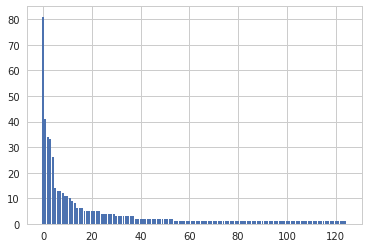

In [21]:
%matplotlib inline
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [22]:
pprint(list(zip(feature_name, count)))

[('컨테이너', 81),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 33),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('삭제', 12),
 ('이름', 11),
 ('아이디', 11),
 ('다음', 10),
 ('시작', 9),
 ('목록', 8),
 ('옵션', 6),
 ('a181562ac4d8', 6),
 ('입력', 6),
 ('외부', 5),
 ('출력', 5),
 ('해당', 5),
 ('호스트', 5),
 ('명령어', 5),
 ('확인', 5),
 ('경우', 5),
 ('재시작', 4),
 ('존재', 4),
 ('컴퓨터', 4),
 ('터미널', 4),
 ('프롬프트', 4),
 ('포트', 4),
 ('377ad03459bf', 3),
 ('가상', 3),
 ('수행', 3),
 ('문자열', 3),
 ('dockeruser', 3),
 ('항목', 3),
 ('마찬가지', 3),
 ('대화형', 3),
 ('종료', 2),
 ('상태', 2),
 ('저장', 2),
 ('호스트간', 2),
 ('작업', 2),
 ('지정', 2),
 ('생각', 2),
 ('문헌', 2),
 ('동작', 2),
 ('시스템', 2),
 ('명시해', 2),
 ('특정', 2),
 ('관련하', 2),
 ('이때', 2),
 ('의미', 2),
 ('추가', 2),
 ('조합', 1),
 ('container', 1),
 ('폴더', 1),
 ('a1e4ed2ac65b', 1),
 ('작동', 1),
 ('자체', 1),
 ('자동', 1),
 ('image', 1),
 ('정지', 1),
 ('핵심', 1),
 ('초간단', 1),
 ('중복', 1),
 ('id', 1),
 ('최소한', 1),
 ('일부분', 1),
 ('컨테이', 1),
 ('daemon', 1),
 ('컨테이너상', 1),
 ('한다', 1),
 ('콜론', 1),
 ('태그', 1),
 ('하